<a href="https://colab.research.google.com/github/vps123456740/Machine-Learning/blob/main/Gold_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1.   Positive
2.   Negative



In [12]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])


numerical_data = gold_data.select_dtypes(include=['number'])


correlation = numerical_data.corr()

<Axes: >

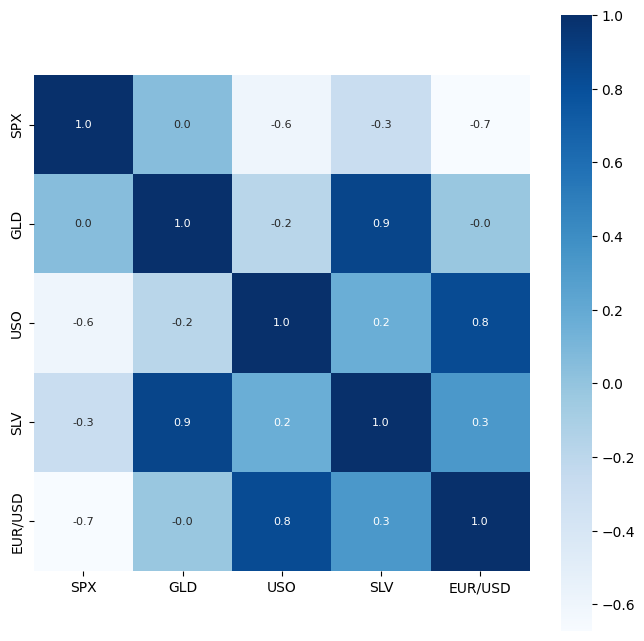

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues' )

In [14]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-e9eb200751f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='Blue')


<Axes: xlabel='GLD', ylabel='Density'>

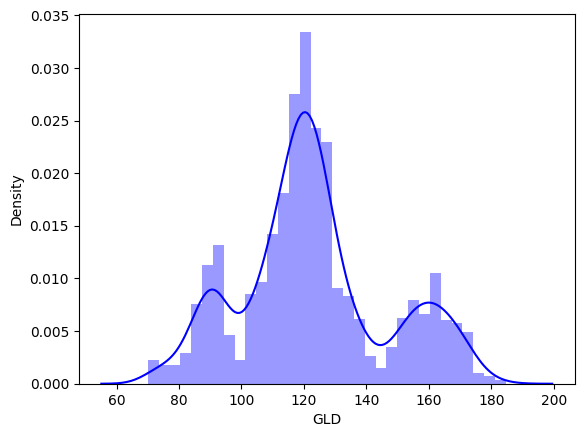

In [15]:
# checking the distributions of GLD price
sns.distplot(gold_data['GLD'],color='Blue')

Splitting the Features and Target

In [17]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

Random Forest Regression

In [21]:
rand_regressor=RandomForestRegressor(n_estimators=100)

In [22]:
rand_regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [25]:
error_score=metrics.r2_score(Y_train,rand_regressor.predict(X_train))
print('R squared error:',error_score)

R squared error: 0.9985233426110929


In [23]:
test_data_prediction=rand_regressor.predict(X_test)

In [24]:
print(test_data_prediction)

[168.76330015  81.97709974 116.09470034 127.53720058 120.64840166
 154.69899747 150.17969862 126.15440016 117.44199871 125.99820066
 116.70330083 172.0671011  141.51249838 167.81339826 115.3281002
 117.69230021 138.81440324 169.98290108 159.41800329 159.89009894
 155.14510033 125.34480019 175.71290006 157.21330297 125.26140034
  93.86419928  77.52339963 120.32870018 119.0158991  167.5004997
  88.12130043 125.1599      91.04820039 117.66990026 121.1507992
 136.87950107 115.3731014  115.22420102 147.27059984 107.18410103
 104.58960246  87.24759806 126.44950032 117.99409983 153.78529879
 119.74180025 108.32419973 108.08219801  93.16320062 127.15419748
  75.46690023 113.6311991  121.08020014 111.40609964 118.90199918
 120.90349939 159.51130059 168.17180069 147.07679652  85.92179873
  94.31620052  86.80159931  90.58470024 119.03170077 126.50610048
 127.59589998 171.33210017 122.2679993  117.41009874  98.74550028
 168.5870017  143.19429751 132.32120241 121.08380212 120.88909937
 119.72920055

In [26]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9887116959482002


Compare the Actual Values and Predicted Values in a plot

In [27]:
Y_test=list(Y_test)


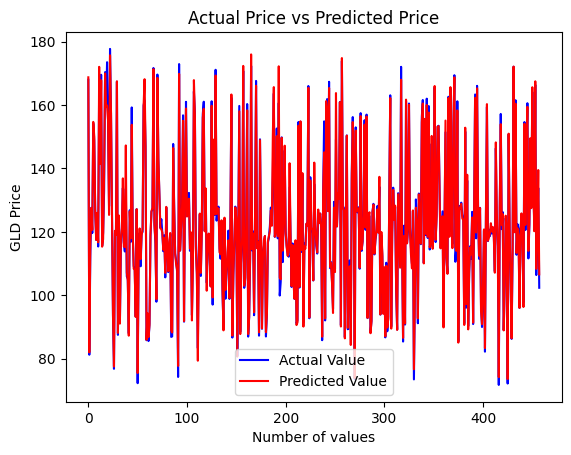

In [29]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='red',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()